In [1]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve,plot_confusion_matrix

In [3]:
#import the dataset
data=pd.read_csv("C:\\Users\\APOORVA  SHARMA\\Downloads\\diabetes.csv")

In [4]:
# it will read the top 5 data of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#check if there is nulls in the dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# describes the number of rows and columns
data.shape

(768, 9)

In [7]:
# it describes the datatype of the each columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [10]:
# correlation between all of the variables
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

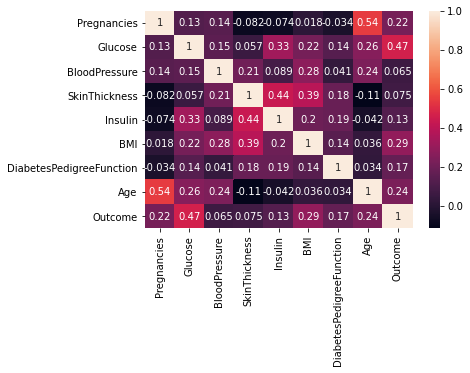

In [11]:
sns.heatmap(data.corr(),annot=True)

C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


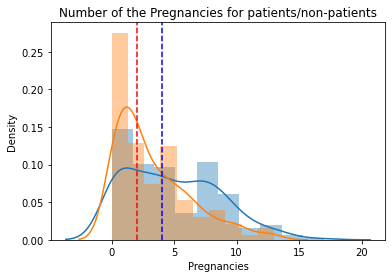

In [12]:
sns.distplot(data[data['Outcome']==1]['Pregnancies'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(data[data['Outcome']==0]['Pregnancies'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Number of the Pregnancies for patients/non-patients')
plt.axvline(num.median(data[data['Outcome']==0]['Pregnancies']),color='red', linestyle='--')
plt.axvline(num.median(data[data['Outcome']==1]['Pregnancies']),color='blue', linestyle='--')

C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


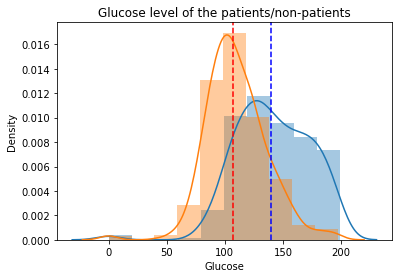

In [13]:
sns.distplot(data[data['Outcome']==1]['Glucose'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(data[data['Outcome']==0]['Glucose'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Glucose level of the patients/non-patients')
plt.axvline(num.median(data[data['Outcome']==0]['Glucose']),color='red', linestyle='--')
plt.axvline(num.median(data[data['Outcome']==1]['Glucose']),color='blue', linestyle='--')

C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


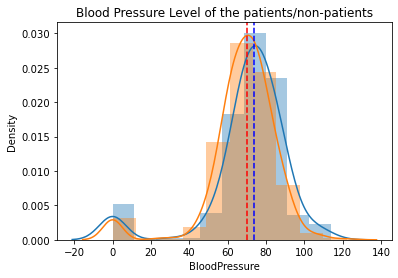

In [14]:
sns.distplot(data[data['Outcome']==1]['BloodPressure'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(data[data['Outcome']==0]['BloodPressure'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Blood Pressure Level of the patients/non-patients')
plt.axvline(num.median(data[data['Outcome']==0]['BloodPressure']),color='red', linestyle='--')
plt.axvline(num.median(data[data['Outcome']==1]['BloodPressure']),color='blue', linestyle='--')

C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


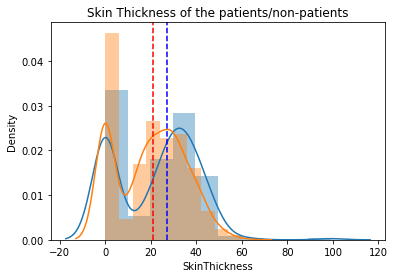

In [15]:
sns.distplot(data[data['Outcome']==1]['SkinThickness'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(data[data['Outcome']==0]['SkinThickness'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Skin Thickness of the patients/non-patients')
plt.axvline(num.median(data[data['Outcome']==0]['SkinThickness']),color='red', linestyle='--')
plt.axvline(num.median(data[data['Outcome']==1]['SkinThickness']),color='blue', linestyle='--')

C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


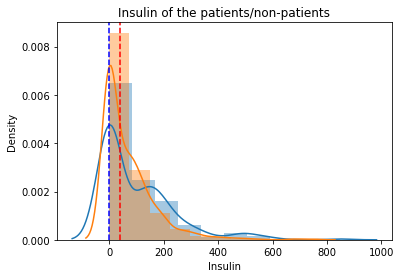

In [16]:
sns.distplot(data[data['Outcome']==1]['Insulin'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(data[data['Outcome']==0]['Insulin'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Insulin of the patients/non-patients')
plt.axvline(num.median(data[data['Outcome']==0]['Insulin']),color='red', linestyle='--')
plt.axvline(num.median(data[data['Outcome']==1]['Insulin']),color='blue', linestyle='--')

C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


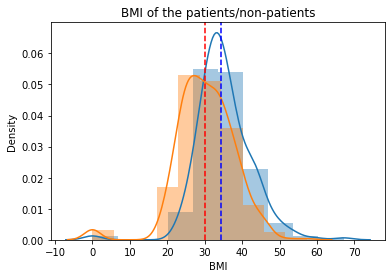

In [17]:
sns.distplot(data[data['Outcome']==1]['BMI'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(data[data['Outcome']==0]['BMI'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('BMI of the patients/non-patients')
plt.axvline(num.median(data[data['Outcome']==0]['BMI']),color='red', linestyle='--')
plt.axvline(num.median(data[data['Outcome']==1]['BMI']),color='blue', linestyle='--')

C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


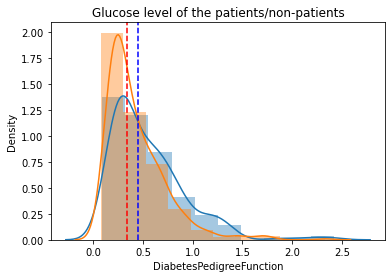

In [18]:
sns.distplot(data[data['Outcome']==1]['DiabetesPedigreeFunction'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(data[data['Outcome']==0]['DiabetesPedigreeFunction'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Glucose level of the patients/non-patients')
plt.axvline(num.median(data[data['Outcome']==0]['DiabetesPedigreeFunction']),color='red', linestyle='--')
plt.axvline(num.median(data[data['Outcome']==1]['DiabetesPedigreeFunction']),color='blue', linestyle='--')

C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


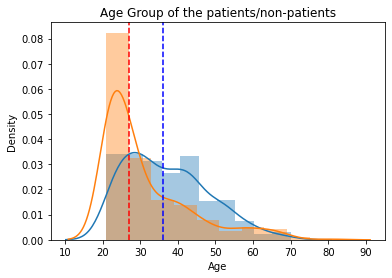

In [19]:
sns.distplot(data[data['Outcome']==1]['Age'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(data[data['Outcome']==0]['Age'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Age Group of the patients/non-patients')
plt.axvline(num.median(data[data['Outcome']==0]['Age']),color='red', linestyle='--')
plt.axvline(num.median(data[data['Outcome']==1]['Age']),color='blue', linestyle='--')

In [20]:
data['Outcome'].value_counts()/len(data)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [21]:
#Define X, y variable Standardization 
y=data.iloc[:,-1]
std =StandardScaler()                 # scale numeric columns
X = pd.DataFrame(std.fit_transform(data.iloc[:,:-1]),columns=data.iloc[:,:-1].columns)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=100)
print(len(X_train))
print(len(X_test))

614
154


In [23]:
X_train.shape   
X_test.shape

(154, 8)

In [24]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
660,1.827813,1.286484,0.770014,-1.288212,-0.692891,-0.544811,-0.875461,1.766346
69,0.046014,0.785730,0.821712,0.405445,0.175399,-0.392508,-0.854320,-0.531023
85,-0.547919,-0.340968,0.253036,0.530902,0.392471,0.051710,0.682920,-0.531023
219,0.342981,-0.278373,-0.160546,-1.288212,-0.692891,0.737074,-0.636871,0.660206
712,1.827813,0.253678,-0.367337,0.969998,-0.692891,1.168599,-0.093250,0.404942


In [25]:
X_train_lm=X_train.values.reshape(-1,1)
X_train_lm.shape
X_test_lm=X_test.values.reshape(-1,1)
X_test_lm.shape

(1232, 1)

In [26]:
def model_prediction(algorithm, X_train, X_test, y_train):
  algorithm_fit = algorithm.fit(X_train, y_train)
  predictions  = algorithm.predict(X_test)
  probabilities = algorithm.predict_proba(X_test)
  return algorithm_fit, predictions, probabilities

In [27]:
def prediction(algorithm, X_train, X_test, y_train, y_test) :
    
    # model prediction
    algorithm_fit, predictions, probabilities = model_prediction(algorithm, X_train, X_test, y_train)

    # print summary
    print ("\n Classification report : \n", classification_report(y_test, predictions))
    print ("Accuracy   Score : ", accuracy_score(y_test, predictions))

    # plot confusion matrix 
    plot_confusion_matrix(algorithm_fit, X_test, y_test, cmap=plt.cm.Blues,display_labels=['No Diabetes','Diabetes'])
    plt.title('Confusion Matrix')
    
    # plot roc curve
    plot_roc_curve(algorithm_fit, X_test, y_test)
    ax = plt.gca()
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
    plt.title('Receiver Operating Characteristic')

In [28]:
# rescale the features
scaler = MinMaxScaler()

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\APOORVA  SHARMA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.6498334         nan 0.6498334         nan 0.6498334
        nan 0.65471145        nan 0.7328402         nan 0.77519659
        nan 0.77844862        nan 0.78660536        nan 0.78661869
        nan 0.78821805        nan 0.78659203        nan 0.78659203
        nan 0.78659203        nan 0.78659203        nan 0.78659203
        nan 0.78659203        nan 0.78659203        nan 0.78659203
        nan 0.78659203        nan 0.78659203]
  warnings.warn(



 Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.64      0.51      0.57        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.73       154

Accuracy   Score :  0.7337662337662337


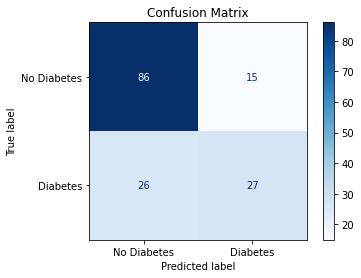

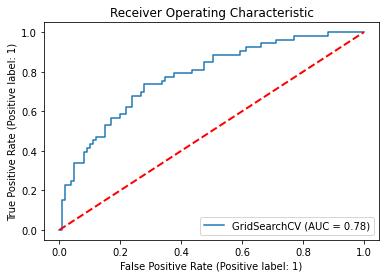

In [29]:
##logistic regression classifier with hyperparameter tuning using GridSearchCV
parameters = {'penalty' : ['l1', 'l2'], 'C' : num.logspace(-4, 4, 20)}
logit = GridSearchCV(LogisticRegression(random_state=100),parameters,cv = 5, verbose=True, n_jobs=-1)
prediction(logit,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits

 Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       101
           1       0.63      0.55      0.59        53

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

Accuracy   Score :  0.7337662337662337


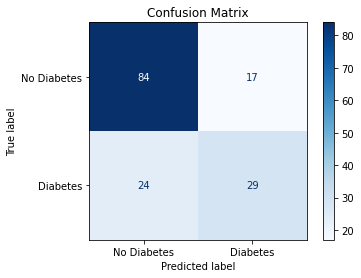

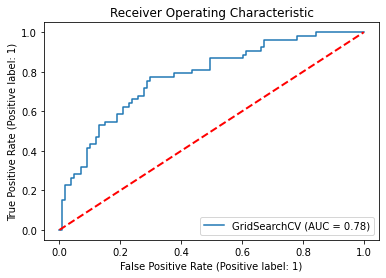

In [30]:
##svm classifer with hyperparameter tuning using GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = GridSearchCV(SVC(random_state=100,probability=True), parameters, cv = 5, verbose=True, n_jobs=-1)
prediction(svc,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits

 Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       101
           1       0.58      0.49      0.53        53

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154

Accuracy   Score :  0.7012987012987013


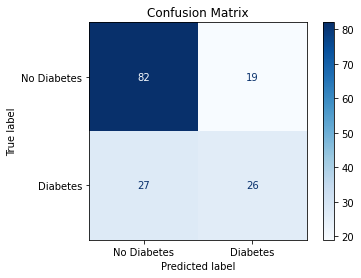

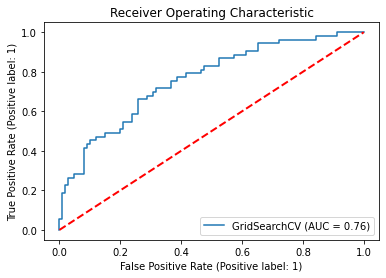

In [31]:
## random forest classifer with hyperparameter tuning using GridSearchCV
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, n_jobs = -1, verbose = 2)
prediction(rf,X_train, X_test, y_train, y_test)